Create a results dataframe of a bowling tournament
==

In [52]:
# import libraries
import pandas as pd

# Input after tournament

In [53]:
city = 'Eindhoven'
date = "10-08-2018"

In [93]:
sheet_dict_string = [
                    {'player':'Vlad', 'game':0, 'score_string':'7-359/7-9/81-99-9/X7/'},
                    {'player':'Dymytry', 'game':0, 'score_string':'9/369-X 9/X 728-9/33 '},
                    {'player':'Kaspareski', 'game':0, 'score_string':'347-62X 8/7-537/639/9'},
                    {'player':'Don', 'game':0, 'score_string':'26236/81-/X X X 9-X18'},
                    {'player':'Brunswick', 'game':0, 'score_string':'7-9-6-X 8/729-X 6/71 '},
    
                    {'player':'Vlad', 'game':1, 'score_string':'9/7/639/9-9/639-9/8/9'},
                    {'player':'Dymytry', 'game':1, 'score_string':'X 9-8/X 9-X X 8-526/5'},
                    {'player':'Kaspareski', 'game':1, 'score_string':'X X 43427-X 9/-/X 7- '},
                    {'player':'Don', 'game':1, 'score_string':'729/7-9/X X 81X X 9/9'},
                    {'player':'Brunswick', 'game':1, 'score_string':'7-X 53-6317/549/8-13 '},
                    
                    {'player':'Vlad', 'game':2, 'score_string':'811/639/8/X X 72519- '},
                    {'player':'Dymytry', 'game':2, 'score_string':'9/18X 9-3-339-338-7- '},
                    {'player':'Kaspareski', 'game':2, 'score_string':'9/3/9/X 728-9/7272X1-'},
                    {'player':'Don', 'game':2, 'score_string':'9-629/2518X X 9-7181 '},
                    {'player':'Brunswick', 'game':2, 'score_string':'439-6-X 3/6331719--7 '},
                     
                    {'player':'Vlad', 'game':3, 'score_string':'X 7/71X 8-8/9/X X 6- '},
                    {'player':'Dymytry', 'game':3, 'score_string':'61X X 728/X 9/6/7/9/8'},
                    {'player':'Kaspareski', 'game':3, 'score_string':'9-637-81718-9/8/7-34 '},
                    {'player':'Don', 'game':3, 'score_string':'X 817-8-81278-9/8-34 '},
                    {'player':'Brunswick', 'game':3, 'score_string':'2-4-7--/6---9/818-72'},
                     
                    {'player':'Vlad', 'game':4, 'score_string':'817/4/549-36X X X 71 '},
                    {'player':'Dymytry', 'game':4, 'score_string':'9/9/9/62X 6/16619/8/7'},
                    {'player':'Kaspareski', 'game':4, 'score_string':'717/9-9-X 128/44448- '},
                    {'player':'Don', 'game':4, 'score_string':'9/5361X 7281X 9/9/8/8'},
                    {'player':'Brunswick', 'game':4, 'score_string':'X 72X 71X 515-X 8/XX9'},
    
                    {'player':'Vlad', 'game':5, 'score_string':'366/X 71X 5163X 179/9'},
                    {'player':'Dymytry', 'game':5, 'score_string':'X X X 3-9/X X 413663 '},
                    {'player':'Kaspareski', 'game':5, 'score_string':'8-349/7-9-9/X 5-5-X-6'},
                    {'player':'Don', 'game':5, 'score_string':'9/X 156-729-62-16/81 '},
                    {'player':'Brunswick', 'game':5, 'score_string':'7/6-8-9/5-X 136/8--1 '}
                    
                    ]

# Functions

In [89]:
def valid(game):
    """Check if a game string is valid.
    A valid game string is 21 chars.

    Keyword arguments:
    game -- string of game scores
    """
    if len(game) == 21:
        return True
    return False

def count_event(game, event):
    """Count the number of an event thrown in the game
    
    Keyword arguments:
    game -- a valid game string
    event -- strike
             spare
             rotterdam
             turkey
    
    Return:
    total events -- a int of the total event count
    """
    events = {}
    events['strike'] = 'X'
    events['spare'] = '/'
    events['rotterdam'] = '-/'
    events['turkey'] = 'XXX'
    
    if event == 'turkey':
        game = game.replace(' ','')
        
    return game.count(events[event])

def score(game):
    """Calculate the scores per frame and in total.
    
    Foreach frame there are three possible scoring rules:
    
    
    Rule A. The score for a frame is the total pins bowled over during that frame, if the number is less than ten (an open frame, or error or split depending some other rules beyond the scope of this problem).
    Rule B. If all ten pins are bowled over on the first delivery (a strike), the score for that frame is 10 + the next two deliveries.
    Rule C. If all ten pins are bowled over between the first two deliveries (a spare), the score for that frame is 10 + the next delivery.

    
    Keyword arguments:
    game -- a valid game string
    
    Return:
    results -- a dict with a list of the frames and a list of 10 elements with score tuples
    """
    
    # List to return
    score = list()
    
    # Replace the dash for a zero
    game = game.replace('-','0')
    
    # Total score
    total = 0
    
    # Break the game string in frames
    n = 2
    frames = [game[i:i+n] for i in range(0, len(game)-3, n)]
    frames.append(game[-3:])
    
    # Loop through the frames to apply a score
    # TODO: KEY INDEX ENDING IS FRAME 9 & 10
    for key, frame in enumerate(frames):
        if key < 9:
            if frame[0] == 'X':
                # Rule B should be applied
                frame_score = 10
                
                if key is not 8:
                
                    next_deliveries = frames[key+1] + frames[key+2]

                    if next_deliveries[0] == 'X':
                        frame_score+= 10
                        if next_deliveries[2] == 'X':
                            frame_score+= 10
                        else:
                            frame_score+= int(next_deliveries[2])
                    else:
                        if next_deliveries[1] == '/':
                            frame_score+= 10
                        else:
                            frame_score+= int(next_deliveries[0]) + int(next_deliveries[1])
                else:
                    next_deliveries = frames[key+1]
                    
                    if next_deliveries[1] == '/':
                        frame_score+=10
                    else:
                        for n in next_deliveries[:2]:
                            if n == 'X':
                                frame_score+=10
                            else:
                                frame_score+=int(n)
            elif frame[1] == '/':
                # Rule C should be applied
                next_delivery = frames[key+1][0]
                next_delivery = next_delivery.replace('X','10')
                frame_score = 10 + int(next_delivery)
            else:
                # Rule A should be applied
                frame_score = int(frame[0]) + int(frame[1])
                
        else:
            last = list(frames[9])
            for k,v in enumerate(last):
                if v == ' ':
                    last[k] = 0
                if v == 'X':
                    last[k] = 10
                elif v == '/':
                    last[k] = 10 - int(last[k-1])
            last = [ int(x) for x in last ]
            frame_score = sum(last)
            
        total+= frame_score
        score.append((frame_score, total))
        
    # Undo the dash zero
    frames = [frame.replace('0','-') for frame in frames]
    return {'frames':frames,'score':score}

In [113]:
# calculates scores from the sheet_dict_string
scores = list()
player_game_result = list()

for i in sheet_dict_string:
    result = score(i['score_string'])
    
    player_game_dict = {}
    player_game_dict['player'] = i['player']
    player_game_dict['game'] = i['game']
    
    # Can only be calculated after all players results are build
    player_game_dict['position']= None
    
    player_game_dict['hundred'] = None
    player_game_dict['strikes']= count_event(i['score_string'],'strike')
    player_game_dict['spares']= count_event(i['score_string'],'spare')
    player_game_dict['rotterdam']= count_event(i['score_string'],'rotterdam')
    player_game_dict['turkey'] = count_event(i['score_string'],'turkey')
    player_game_dict['city'] = city
    player_game_dict['date'] = date
    player_game_dict['result'] = result['score'][9][1]
    
    for k,v in enumerate(result['frames']):
        my_dict = {}
        my_dict['player'] = i['player']
        my_dict['game'] = i['game']
        my_dict['city'] = city
        my_dict['date'] = date
        my_dict['frame'] = k+1
        my_dict['thrown'] = v
        my_dict['points'] = result['score'][k][0]
        my_dict['cumulative'] = result['score'][k][1]
        
        if result['score'][k][1] > 99 and player_game_dict['hundred'] is None:
            player_game_dict['hundred'] = my_dict['frame'] = k+1
        
        
        scores.append(my_dict)
        
    player_game_result.append(player_game_dict)

# generate dataframes
frames_df = pd.DataFrame(data=scores, columns=scores[0].keys()) 
player_game_df = pd.DataFrame(data=player_game_result, columns=player_game_result[0].keys())


# Position per player

# Beerframes


# write the dataframes to .csv files for presentation in Power BI
frames_df.to_csv('result_data/{}_{}_FRAMES.csv'.format(city, date))
player_game_df.to_csv('result_data/{}_{}_GAME.csv'.format(city, date),float_format='%.f')

In [91]:
frames_df.shape

(300, 8)

In [112]:
player_game_df

,player,game,position,hundred,strikes,spares,rotterdam,turkey,city,date,result
0,Vlad,0,None,9.0,1,4,0,0,Eindhoven,10-08-2018,124
1,Dymytry,0,None,8.0,2,3,0,0,Eindhoven,10-08-2018,126
2,Kaspareski,0,None,10.0,1,3,0,0,Eindhoven,10-08-2018,118
3,Don,0,None,7.0,4,2,1,1,Eindhoven,10-08-2018,166
4,Brunswick,0,None,9.0,2,2,0,0,Eindhoven,10-08-2018,122
5,Vlad,1,None,8.0,0,6,0,0,Eindhoven,10-08-2018,141
6,Dymytry,1,None,6.0,4,2,0,0,Eindhoven,10-08-2018,152
7,Kaspareski,1,None,8.0,4,2,1,0,Eindhoven,10-08-2018,135
8,Don,1,None,6.0,4,3,0,0,Eindhoven,10-08-2018,177
9,Brunswick,1,None,NaN,1,2,0,0,Eindhoven,10-08-2018,97


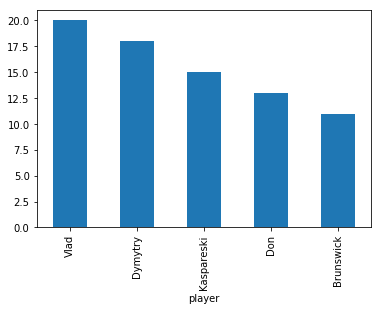

In [99]:
player_game_df.groupby("player")['spares'].sum().sort_values(ascending=False).plot('bar')

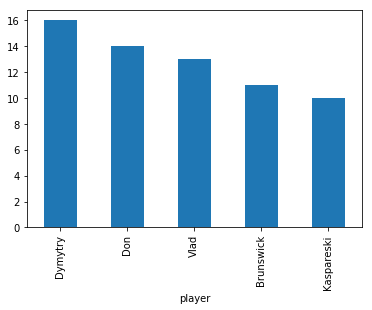

In [102]:
player_game_df.groupby("player")['strikes'].sum().sort_values(ascending=False).plot('bar')

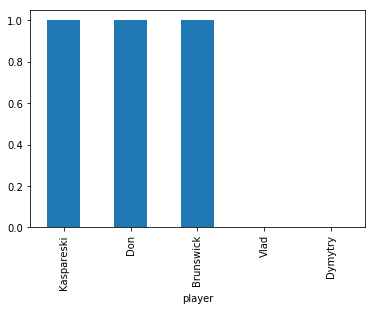

In [103]:
player_game_df.groupby("player")['rotterdam'].sum().sort_values(ascending=False).plot('bar')

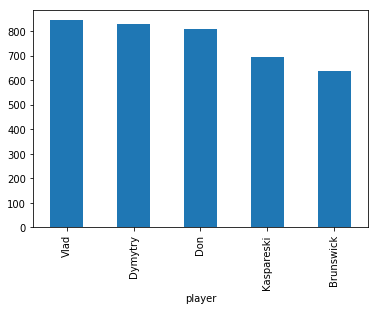

In [104]:
player_game_df.groupby("player")['result'].sum().sort_values(ascending=False).plot('bar')

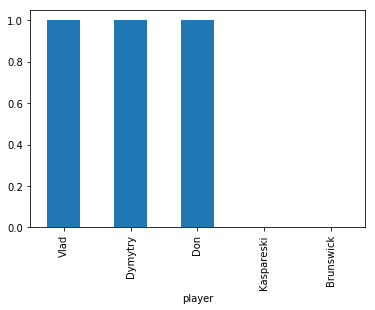

In [105]:
player_game_df.groupby("player")['turkey'].sum().sort_values(ascending=False).plot('bar')

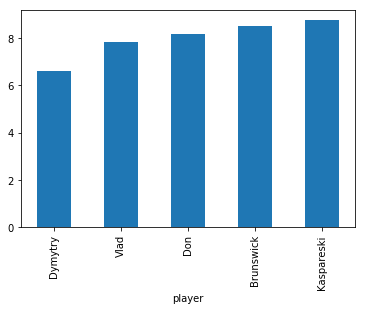

In [108]:
player_game_df.groupby("player")['hundred'].mean().sort_values().plot('bar')

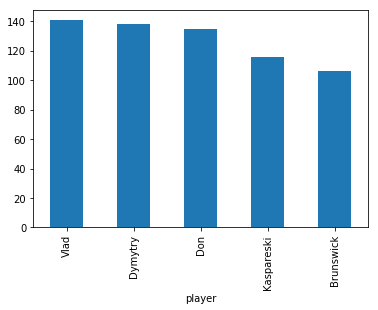

In [107]:
player_game_df.groupby("player")['result'].mean().sort_values(ascending=False).plot('bar')